In [2]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta

# Define the directory where the CSV files are stored
directory = 'C:/Users/pooya/Documents/Python/Marketing/browse_purchase'

# List of all file names
file_names = [
    'browse_purchase_2020_Q1.csv',
    'browse_purchase_2020_Q2.csv',
    'browse_purchase_2020_Q3.csv',
    'browse_purchase_2020_Q4.csv',
    'browse_purchase_2021_Q1.csv',
    'browse_purchase_2021_Q2.csv',
    'browse_purchase_2021_Q3.csv',
    'browse_purchase_2021_Q4.csv',
    'browse_purchase_2022_FY.csv'
]

# Load all datasets into a list of DataFrames
data_frames = []
for file in file_names:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path,low_memory=False)
    data_frames.append(df)
    print(f"Loaded {file} with {len(df)} rows.")

# Concatenate all dataframes into a single dataframe
data = pd.concat(data_frames, ignore_index=True)
print(f"Concatenated data has {len(data)} rows.")

# Convert date columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'], unit='s')

# Define the churn period (e.g., 3 months)
churn_period = timedelta(days=60)

# Get the latest date in the dataset
latest_date = data['date'].max()

# Calculate the cutoff date for churn detection
cutoff_date = latest_date - churn_period

# Check if all data loaded and converted correctly
print(f"Latest date in dataset: {latest_date}")
print(f"Cutoff date for churn: {cutoff_date}")

# Aggregate data by customer to calculate last purchase date and other features
customer_agg = data.groupby('customerId').agg({
    'pageviews': 'sum',
    'timeOnSite': 'sum',
    'bounces': 'sum',
    'interaction_hits': 'sum',
    'products_impressions': 'sum',
    'add_to_wishlist': 'sum',
    'products_added_to_cart': 'sum',
    'products_removed_from_cart': 'sum',
    'products_refunded': 'sum',
    'visit_with_purchase': 'sum',
    'tot_revenue': 'sum',
    'date': 'max'  # Get the last purchase date for each customer
}).reset_index()

# Print aggregated data information
print(f"Aggregated data has {len(customer_agg)} rows.")

# Rename the last purchase date column
customer_agg.rename(columns={'date': 'last_purchase_date'}, inplace=True)

# Label churn: 1 if last purchase date is before cutoff_date, otherwise 0
customer_agg['churn'] = np.where(customer_agg['last_purchase_date'] < cutoff_date, 1, 0)

# Export the new dataset with churn column
output_file_path = 'C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn3.csv'
customer_agg.to_csv(output_file_path, index=False)

print(f"New dataset with churn column has been saved to {output_file_path}")
print(f"Final dataset has {len(customer_agg)} rows.")


Loaded browse_purchase_2020_Q1.csv with 420117 rows.
Loaded browse_purchase_2020_Q2.csv with 1581166 rows.
Loaded browse_purchase_2020_Q3.csv with 1187128 rows.
Loaded browse_purchase_2020_Q4.csv with 1810438 rows.
Loaded browse_purchase_2021_Q1.csv with 1644489 rows.
Loaded browse_purchase_2021_Q2.csv with 991534 rows.
Loaded browse_purchase_2021_Q3.csv with 1115668 rows.
Loaded browse_purchase_2021_Q4.csv with 1361948 rows.
Loaded browse_purchase_2022_FY.csv with 1195659 rows.
Concatenated data has 11308147 rows.
Latest date in dataset: 2022-03-18 00:00:00
Cutoff date for churn: 2022-01-17 00:00:00
Aggregated data has 1530304 rows.
New dataset with churn column has been saved to C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn3.csv
Final dataset has 1530304 rows.


Inspect Sample Data

In [15]:
# Load the new dataset
final_data = pd.read_csv('C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn3.csv')

# Display a sample of the data
print(final_data.head())
final_data.head(5)



                 customerId  pageviews  timeOnSite  bounces  interaction_hits  \
0  +++GRcoGtSSd6mS7WsDXDQ==       10.0       570.0      0.0                 2   
1  +++SJgx/2IJ+dXq7vF8COg==        4.0      1710.0      0.0                 7   
2  +++aKiAiXhTfaqCLC/kyWA==       24.0      1109.0      0.0                18   
3  +++rPSJqJxUybd5VQBJlRw==       76.0      4608.0      0.0                 8   
4  +++tkVCLHtuRHFq/0FGt9A==        4.0      1124.0      0.0                27   

   products_impressions  add_to_wishlist  products_added_to_cart  \
0                    47                0                       0   
1                     0                0                       0   
2                   380                0                       4   
3                    92                0                       2   
4                     0                0                       0   

   products_removed_from_cart  products_refunded  visit_with_purchase  \
0                           0  

,customerId,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,add_to_wishlist,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_purchase,tot_revenue,last_purchase_date,churn
0,+++GRcoGtSSd6mS7WsDXDQ==,10.0,570.0,0.0,2,47,0,0,0,0,0,0.00,2020-12-13,1
1,+++SJgx/2IJ+dXq7vF8COg==,4.0,1710.0,0.0,7,0,0,0,0,0,1,41.94,2021-11-28,1
2,+++aKiAiXhTfaqCLC/kyWA==,24.0,1109.0,0.0,18,380,0,4,0,0,1,40.29,2021-03-16,1
3,+++rPSJqJxUybd5VQBJlRw==,76.0,4608.0,0.0,8,92,0,2,0,0,0,0.00,2020-05-29,1
4,+++tkVCLHtuRHFq/0FGt9A==,4.0,1124.0,0.0,27,0,0,0,0,0,1,31.11,2020-11-30,1


In [8]:
final_data.dtypes

customerId                     object
pageviews                     float64
timeOnSite                    float64
bounces                       float64
interaction_hits                int64
products_impressions            int64
add_to_wishlist                 int64
products_added_to_cart          int64
products_removed_from_cart      int64
products_refunded               int64
visit_with_purchase             int64
tot_revenue                   float64
last_purchase_date             object
churn                           int64
dtype: object

**data conversion**

In [14]:
final_data['last_purchase_date '] = pd.to_datetime(df['date'], format='%Y-%m-%d')
final_data.dtypes
final_data.head(5)

,customerId,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,add_to_wishlist,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_purchase,tot_revenue,last_purchase_date,churn,date,last_purchase_date
0,+++GRcoGtSSd6mS7WsDXDQ==,10.0,570.0,0.0,2,47,0,0,0,0,0,0.00,2020-12-13,1,2022-01-20,2022-01-20
1,+++SJgx/2IJ+dXq7vF8COg==,4.0,1710.0,0.0,7,0,0,0,0,0,1,41.94,2021-11-28,1,2022-01-20,2022-01-20
2,+++aKiAiXhTfaqCLC/kyWA==,24.0,1109.0,0.0,18,380,0,4,0,0,1,40.29,2021-03-16,1,2022-01-20,2022-01-20
3,+++rPSJqJxUybd5VQBJlRw==,76.0,4608.0,0.0,8,92,0,2,0,0,0,0.00,2020-05-29,1,2022-01-20,2022-01-20
4,+++tkVCLHtuRHFq/0FGt9A==,4.0,1124.0,0.0,27,0,0,0,0,0,1,31.11,2020-11-30,1,2022-01-20,2022-01-20


Verify Churn Logic

In [4]:
# Check churn logic
churned_customers = final_data[final_data['churn'] == 1]
active_customers = final_data[final_data['churn'] == 0]

print(f"Churned customers with last purchase date before cutoff: {churned_customers['last_purchase_date'].max()}")
print(f"Active customers with last purchase date on or after cutoff: {active_customers['last_purchase_date'].min()}")


Churned customers with last purchase date before cutoff: 2021-12-17
Active customers with last purchase date on or after cutoff: 2021-12-18


EDA and Modeling

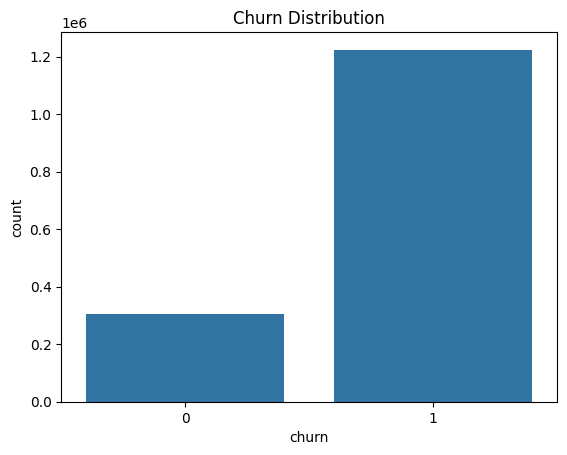

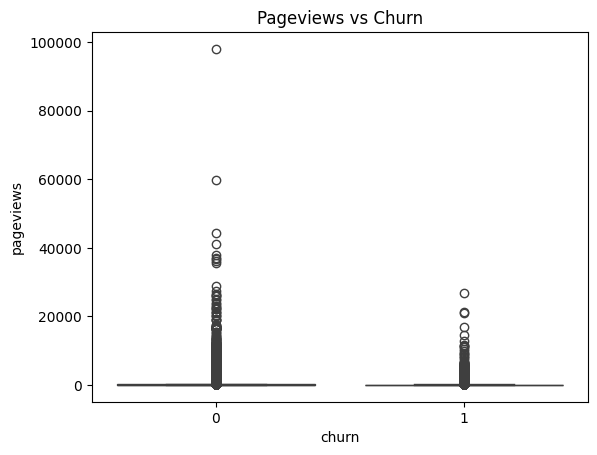

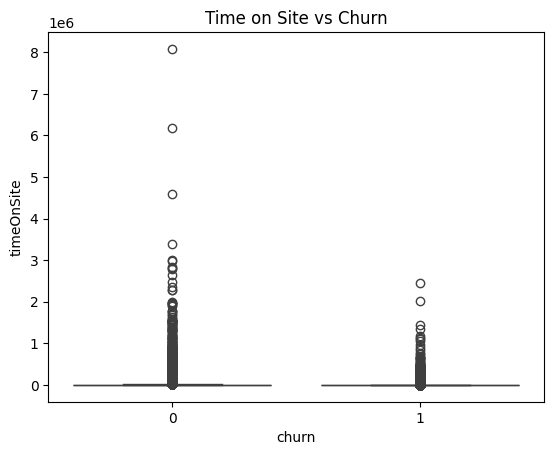

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of churn
sns.countplot(x='churn', data=final_data)
plt.title('Churn Distribution')
plt.show()

# Plot the distribution of some features
sns.boxplot(x='churn', y='pageviews', data=final_data)
plt.title('Pageviews vs Churn')
plt.show()

sns.boxplot(x='churn', y='timeOnSite', data=final_data)
plt.title('Time on Site vs Churn')
plt.show()


Modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target
features = final_data.drop(columns=['customerId', 'last_purchase_date', 'churn'])
target = final_data['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.2f}")


              precision    recall  f1-score   support

           0       0.67      0.08      0.14     61406
           1       0.81      0.99      0.89    244655

    accuracy                           0.81    306061
   macro avg       0.74      0.53      0.51    306061
weighted avg       0.78      0.81      0.74    306061

ROC AUC: 0.65


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn3.csv',low_memory=False)

# Define features and target
features = [
    'pageviews', 'timeOnSite', 'bounces', 'interaction_hits', 'products_impressions',
    'add_to_wishlist', 'products_added_to_cart', 'products_removed_from_cart',
    'products_refunded', 'tot_revenue'
]
X = df[features]
y = df['churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.2f}")

# Add churn likelihood to the original dataset
df['churn_likelihood'] = model.predict_proba(scaler.transform(df[features]))[:, 1]

# Export the dataset with churn likelihood
output_path = 'C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn_likelihood.csv'
df.to_csv(output_path, index=False)

print(f"Dataset with churn likelihood has been saved to {output_path}")


              precision    recall  f1-score   support

           0       0.65      0.05      0.10     45213
           1       0.86      0.99      0.92    260848

    accuracy                           0.86    306061
   macro avg       0.76      0.52      0.51    306061
weighted avg       0.83      0.86      0.80    306061

ROC AUC: 0.65
Dataset with churn likelihood has been saved to C:/Users/pooya/Documents/Python/Marketing/browse_purchase/browse_purchase_with_churn_likelihood.csv
